#### Load Data & Package

In [79]:
import numpy as np
import pandas as pd
import scipy
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy as sqla
import streamlit as st
import time
from scipy import stats
import sys
import io
from babel.numbers import format_currency
import matplotlib.dates as mdates
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import base64
from PIL import Image
from io import BytesIO
from IPython.display import display
import plotly.graph_objects as go
import statsmodels.api as sm

# 🖥️ Main Page

### Metadata
> Latarbelakang

**_Bike sharing_** atau Sistem berbagi sepeda adalah generasi baru dari **penyewaan sepeda tradisional** di mana seluruh proses mulai dari **keanggotaan**, **penyewaan**, dan **pengembalian** sepeda menjadi **otomatis**. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari posisi tertentu dan mengembalikannya di posisi lain. Saat ini, terdapat **lebih dari 500 program** berbagi sepeda di seluruh dunia yang terdiri dari **lebih dari 500k sepeda**. Saat ini, terdapat minat yang besar terhadap sistem ini karena peran penting mereka dalam masalah lalu lintas, lingkungan dan kesehatan. 

Terlepas dari aplikasi dunia nyata yang menarik dari sistem berbagi sepeda, **karakteristik data** yang dihasilkan oleh sistem ini membuatnya menarik untuk penelitian. Berbeda dengan layanan transportasi lain seperti bus atau kereta bawah tanah, **durasi perjalanan**, **posisi keberangkatan** dan **kedatangan secara eksplisit** dicatat dalam sistem ini. Fitur ini mengubah sistem berbagi sepeda menjadi **jaringan sensor virtual** yang dapat digunakan untuk merasakan mobilitas di kota. Dengan demikian, diharapkan sebagian besar kejadian penting di kota dapat dideteksi melalui pemantauan data ini.

> Data set

Proses penyewaan sepeda bersama sangat **berkorelasi** dengan **kondisi lingkungan** dan **musim**. Misalnya, **kondisi cuaca**, **curah hujan**, **hari dalam seminggu**, **musim**, **jam dalam sehari**, dan lain-lain dapat mempengaruhi perilaku penyewaan. Kumpulan data inti terkait dengan catatan historis selama **dua tahun** yang berkaitan dengan tahun **2011** dan **2012** dari sistem Capital Bikeshare, Washington D.C., Amerika Serikat yang tersedia untuk umum di http://capitalbikeshare.com/system-data. Kami mengumpulkan data tersebut dalam dua basis data **per jam** dan **per hari**, kemudian mengekstrak dan menambahkan **informasi cuaca** dan **musim** yang sesuai. Informasi cuaca diambil dari http://www.freemeteo.com.

> Tugas terkait
* **Regresi**: 
	**Prediksi jumlah penyewaan sepeda** per jam atau per hari **berdasarkan pengaturan lingkungan dan musim**.
	
* **Deteksi Peristiwa dan Anomali**:  
	**Jumlah sepeda yang disewa** juga **berkorelasi** dengan beberapa **peristiwa di kota** yang dapat dengan mudah ditelusuri melalui mesin pencari.	Sebagai contoh, kueri seperti "2012-10-30 washington d.c." di Google mengembalikan hasil yang terkait dengan **Badai Sandy**. Beberapa peristiwa penting diidentifikasi dalam [1]. Oleh karena itu, data tersebut dapat digunakan untuk **validasi algoritma** **pendeteksi anomali atau kejadian**.

> Karakteristik Dataset

Baik hour.csv dan day.csv memiliki bidang berikut, kecuali hr yang tidak tersedia di day.csv
	
* `instant`    : indeks catatan
* `dteday`     : tanggal
* `season`     : musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin)
* `yr`         : tahun (0: 2011, 1: 2012)
* `mnth`       : bulan (1 hingga 12)
* `hr`         : jam (0 hingga 23)
* `holiday`    : hari cuaca hari libur atau tidak (diambil dari http://dchr.dc.gov/page/holiday-schedule)
* `weekday`    : hari dalam seminggu
* `workingday` : jika hari tersebut bukan akhir pekan atau hari libur maka nilainya 1, jika tidak maka nilainya 0.
* `weathersit` : 
	- 1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
	- 2: Kabut + Mendung, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
	- 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan
	- 4: Hujan Lebat + Hujan Es + Badai Petir + Kabut, Salju + Kabut
* `temp`       : Suhu yang dinormalisasi dalam Celcius. Nilai dibagi menjadi 41 (maks)
* `atemp`      : Suhu perasaan yang dinormalisasi dalam Celcius. Nilai dibagi menjadi 50 (maks)
* `hum`        : Kelembapan yang dinormalisasi. Nilai dibagi menjadi 100 (maks)
* `windspeed`  : Kecepatan angin yang dinormalisasi. Nilai dibagi menjadi 67 (maks)
* `casual`     : jumlah pengguna biasa
* `registered` : jumlah pengguna terdaftar
* `cnt`        : jumlah total sepeda yang disewa termasuk yang kasual dan terdaftar

#### Tabel Data

In [29]:
# Data day
day_df = pd.read_csv("https://raw.githubusercontent.com/Zen-Rofiqy/Bangkit-2024/main/04%20Analisis%20Data%20dng%20Py/%40Proyek-akhir/Bike-sharing-dataset/day.csv")
day_df.head(n=7)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510


#### Pertanyaan Bisinis
1. Bagaimana pola penggunaan sepeda berdasarkan musim dan kondisi cuaca di Washington D.C. selama dua tahun terakhir?
    - **Visualisasi Data:**  
        * Histogram/Density plot jumlah sepeda yang disewa per musim dengan variasi kondisi cuaca sebagai warna atau bentuk yang berbeda-beda. 
        * Line Chart (Time Series) menunjukkan tren penggunaan sepeda selama dua tahun terakhir berdasarkan musim.
2. Bagaimana pengaruh hari libur terhadap pola penggunaan sepeda di Washington D.C. selama dua tahun terakhir?
    - **Visualisasi Data:**  
        * Bar Chart menunjukkan perbandingan jumlah sepeda yang disewa pada hari libur dan hari kerja selama dua tahun terakhir. 
        * Line Chart menunjukkan tren penggunaan sepeda selama dua tahun terakhir dengan penandaan hari libur yang berbeda.

# 🛠️ Data Wrangling

#### Assessing Data
Sebagai permulaan, kita memeriksa tipe data data dari tiap kolom yang terdapat dalam `day_df`. Proses ini dapat dilakukan menggunakan method `info()` seperti contoh kode berikut.

In [30]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Jika diperhatikan, jumlah baris data semuanya itu sama yakni 731. Ini menandakan tiadak adanya *missing data*. Namun tipe data masih belum sesuai, contohnya `season` seharusnya bertipe `category`.

#### Mengubah Tipe Data

In [31]:
dw_df = pd.DataFrame(day_df)

dw_df['season'] = dw_df['season'].replace({1: 'M Semi', 2: 'M Panas', 3:"M Gugur", 4:"M Dingin"})
dw_df['yr'] = dw_df['yr'].replace({0: '2011', 1: '2012'})
dw_df['mnth']= dw_df['mnth'].astype('category')
dw_df['holiday'] = dw_df['holiday'].replace({0: '-', 1: 'Libur'}).astype('category')
dw_df['workingday'] = dw_df['workingday'].replace({0: 'WeekEnd', 1: 'WeekDay'}).astype('category')
dw_df['workingday']= dw_df['workingday'].astype('category')
dw_df['weekday'] = dw_df['weekday'].replace({0: 'Senin', 1: 'Selasa', 2:'Rabu', 3:'Kamis', 4:"Jum'at", 5:"Sabtu", 6:"Minggu"})
dw_df['weathersit'] = dw_df['weathersit'].replace({1: 'Cerah', 2: 'Berkabut', 3:'Salju Ringan', 4:'Hujan Lebat'})
dw_df['season']= dw_df['season'].astype('category')
dw_df['yr']= dw_df['yr'].astype('category')
dw_df['weekday']= dw_df['weekday'].astype('category')
dw_df['weathersit'] = dw_df['weathersit'].astype('category')

dw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     731 non-null    int64   
 1   dteday      731 non-null    object  
 2   season      731 non-null    category
 3   yr          731 non-null    category
 4   mnth        731 non-null    category
 5   holiday     731 non-null    category
 6   weekday     731 non-null    category
 7   workingday  731 non-null    category
 8   weathersit  731 non-null    category
 9   temp        731 non-null    float64 
 10  atemp       731 non-null    float64 
 11  hum         731 non-null    float64 
 12  windspeed   731 non-null    float64 
 13  casual      731 non-null    int64   
 14  registered  731 non-null    int64   
 15  cnt         731 non-null    int64   
dtypes: category(7), float64(4), int64(4), object(1)
memory usage: 57.9+ KB


Terlihat bahwa semua tipe data kini sudah sesuai.

#### Mengecek Missing Data

In [32]:
dw_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Memang terbukti bahwa tidak ada missing value pada data`dw_df`.

#### Jumlah Data Duplikat

In [33]:
print("Jumlah data duplikat: " + str(dw_df.duplicated().sum()))

Jumlah data duplikat: 0


Terlihat bahwa tidak ada data duplikat. 

### Tabel Data

Notes: `mth` tidak diubah menjadi nama bulan karena lebih mudah jika dalam bentuk angka.

In [34]:
dw_df.head(n=7)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,M Semi,2011,1,-,Minggu,WeekEnd,Berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,M Semi,2011,1,-,Senin,WeekEnd,Berkabut,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,M Semi,2011,1,-,Selasa,WeekDay,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,M Semi,2011,1,-,Rabu,WeekDay,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,M Semi,2011,1,-,Kamis,WeekDay,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,M Semi,2011,1,-,Jum'at,WeekDay,Cerah,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,M Semi,2011,1,-,Sabtu,WeekDay,Berkabut,0.196522,0.208839,0.498696,0.168726,148,1362,1510


# 📊 Eksplorasi Data

#### Jumlah Total

In [39]:
def count(dw_df) :
    sumcount = dw_df['cnt'].sum()
    return sumcount

print("Total Sepeda yang Disewa =", count(dw_df))
print("Total Pengguna Terdaftar =", dw_df['registered'].sum())
print("Total Pengguna Biasa =", dw_df['casual'].sum())

Total Sepeda yang Disewa = 3292679
Total Pengguna Terdaftar = 2672662
Total Pengguna Biasa = 620017


## Sebaran Data

### Sebaran Diskrit

c:\Users\Fathan\Documents\Obsidian Vault\2. Kuliah\Smt 6\@ Bangkit 2024\myenv\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\Fathan\Documents\Obsidian Vault\2. Kuliah\Smt 6\@ Bangkit 2024\myenv\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\Fathan\Documents\Obsidian Vault\2. Kuliah\Smt 6\@ Bangkit 2024\myenv\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed

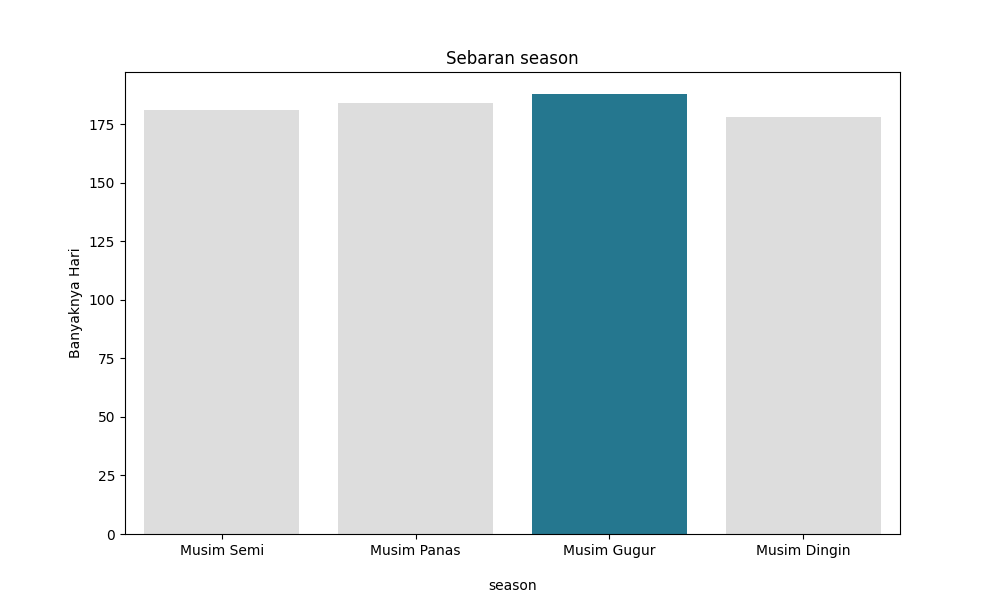

'Dalam periode 2 tahun yang diamati, Musim Gugur mencatat jumlah hari terbanyak dibandingkan dengan musim lainnya, dengan total mencapai 188 hari.'

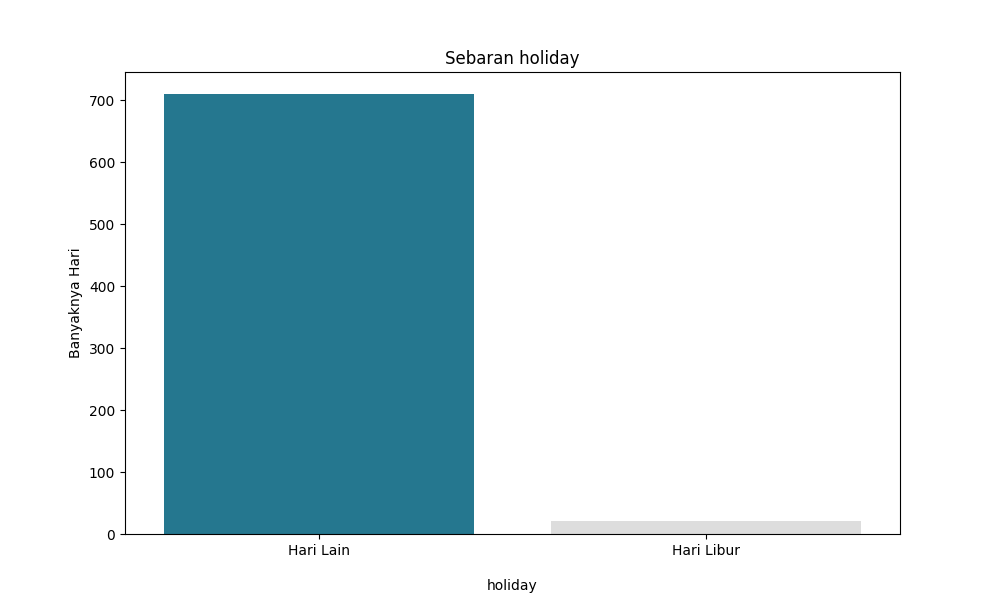

'Hari Libur Nasional (tidak termasuk weekend) dalam rentang waktu dua tahun terbilang jarang.\nPada hari libur nasional, terdapat hanya 21 hari, sedangkan pada hari biasa, terdapat 710 hari.'

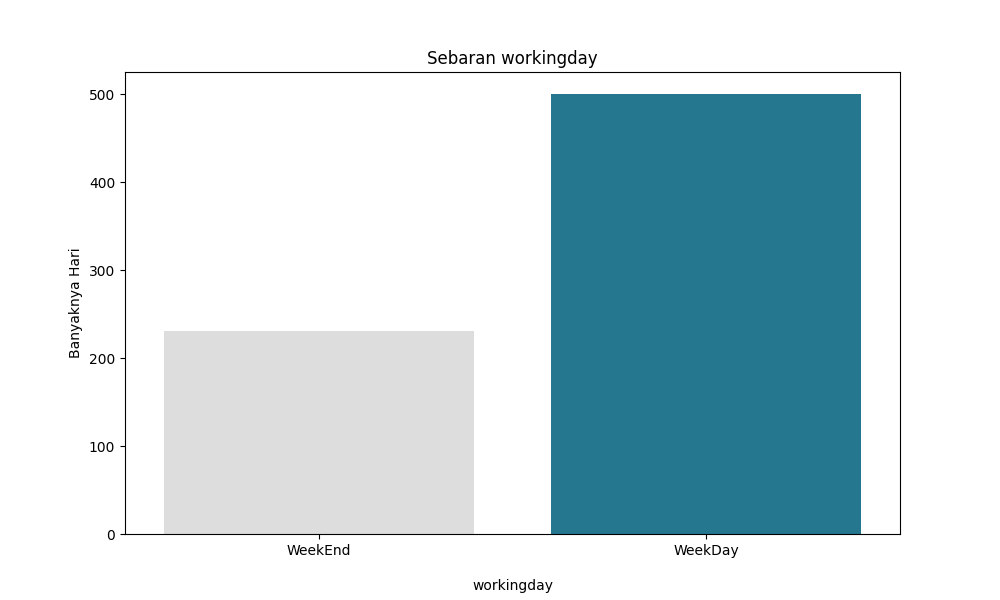

'Hari Libur Nasional (tidak termasuk weekend) dalam rentang waktu dua tahun terbilang jarang.\nPada hari libur nasional, terdapat hanya 21 hari, sedangkan pada hari biasa, terdapat 710 hari.'

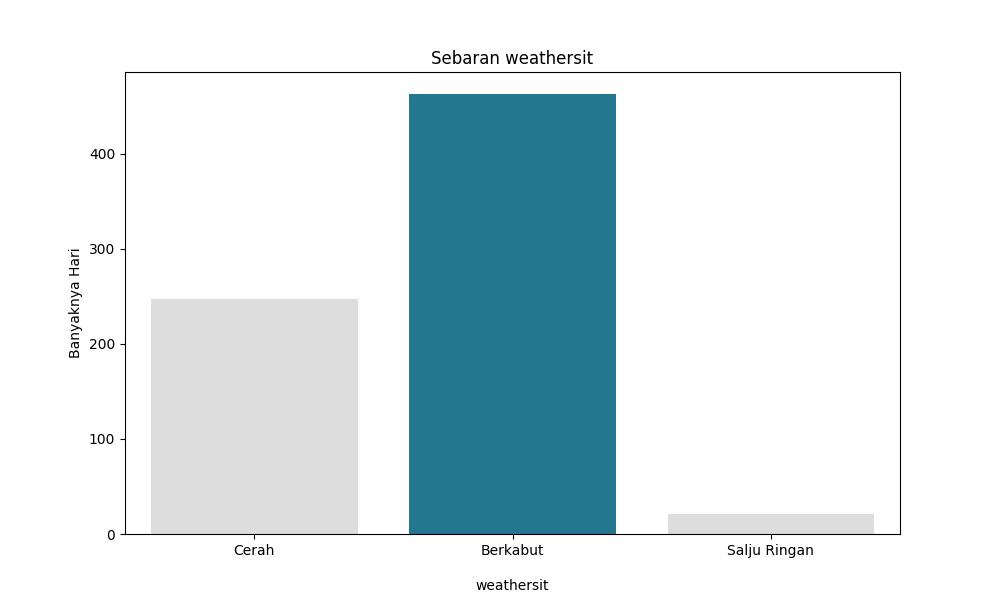

'Selama dua tahun, cuaca sering berkabut.\nTerjadi 247 hari dengan kondisi cuaca berkabut, 463 hari dengan cuaca cerah, dan hanya 21 hari dengan cuaca salju ringan.'

In [46]:
def plot_disk(data_frame, column, names=None):
    # Mendapatkan kategori unik dan warna untuk plot
    max_value = data_frame[column].value_counts().idxmax()
    categories = data_frame[column].unique()
    colors = ['#1380A1' if x == max_value else '#dddddd' for x in categories]

    # Mendapatkan nama kategori
    category_names = [str(cat) for cat in categories]
    if names:
        category_names = names

    # Membuat countplot
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=data_frame, order=categories, palette=colors)
    plt.title(f'Sebaran {column}')
    plt.xlabel(f'\n{column}')
    plt.ylabel('Banyaknya Hari')

    # Mengatur label pada sumbu x
    plt.xticks(ticks=range(len(categories)), labels=category_names)

    # Simpan plot dalam format PNG
    buffer = io.BytesIO()
    plt.savefig(buffer, format='png')
    buffer.seek(0)

    # Menutup plot untuk plot selanjutnya
    plt.close()

    return buffer

# Menyimpan plot
c_season = plot_disk(dw_df, 'season', names=['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
c_holiday = plot_disk(dw_df, 'holiday', names=['Hari Lain', 'Hari Libur'])
c_workingday = plot_disk(dw_df, 'workingday', names=['WeekEnd', 'WeekDay'])
c_weathersit = plot_disk(dw_df, 'weathersit', names=['Cerah', 'Berkabut', 'Salju Ringan'])

# Menampilkan plot
# Membuat tiga kolom
c1, c2 = st.columns((1, 1))
c3, c4 = st.columns((1, 1))

# Menampilkan gambar dengan judul dan caption opsional di setiap kolom
def img_capt(title, image_bytes, default_caption):
    # Membaca kembali gambar dari objek BytesIO
    image_bytes.seek(0)
    img = Image.open(image_bytes)
    
    # Menampilkan gambar dengan judul dan tombol
    display(img)
    display(default_caption)

# Menampilkan gambar dengan judul dan caption opsional di setiap kolom
img_capt("Sebaran Musim", c_season, "Dalam periode 2 tahun yang diamati, Musim Gugur mencatat jumlah hari terbanyak dibandingkan dengan musim lainnya, dengan total mencapai 188 hari.")
img_capt("Sebaran Hari Libur Nasional", c_holiday, "Hari Libur Nasional (tidak termasuk weekend) dalam rentang waktu dua tahun terbilang jarang.\nPada hari libur nasional, terdapat hanya 21 hari, sedangkan pada hari biasa, terdapat 710 hari.")
img_capt("Sebaran Hari WeekEnd & WeekDay", c_workingday, "Hari Libur Nasional (tidak termasuk weekend) dalam rentang waktu dua tahun terbilang jarang.\nPada hari libur nasional, terdapat hanya 21 hari, sedangkan pada hari biasa, terdapat 710 hari.")
img_capt("Sebaran Cuaca", c_weathersit, "Selama dua tahun, cuaca sering berkabut.\nTerjadi 247 hari dengan kondisi cuaca berkabut, 463 hari dengan cuaca cerah, dan hanya 21 hari dengan cuaca salju ringan.")


### Sebaran Kontinu

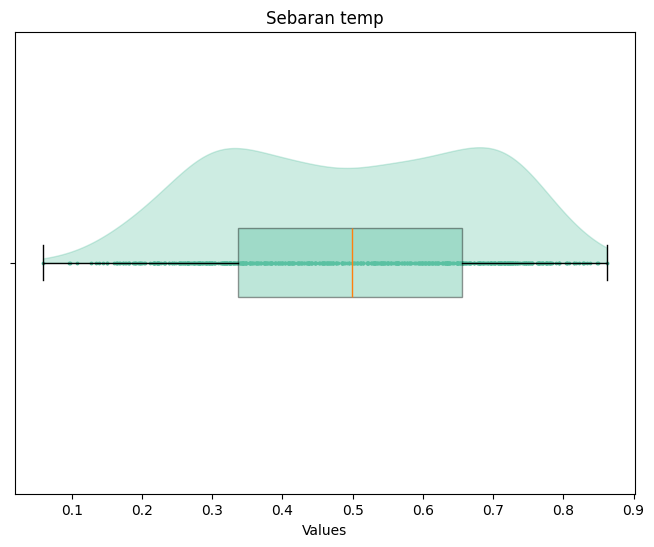

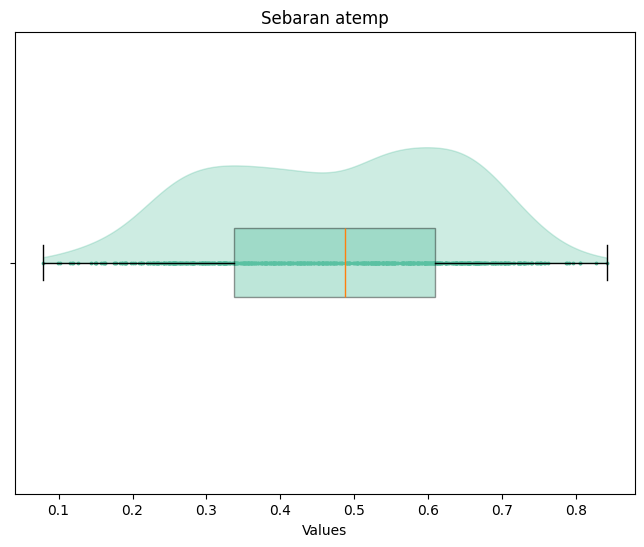

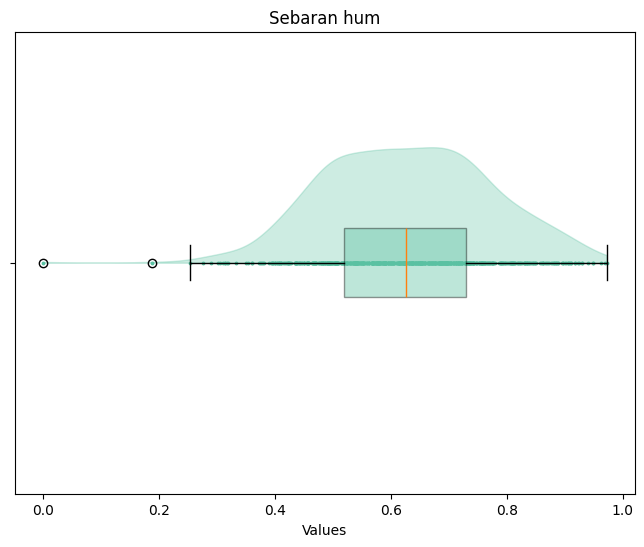

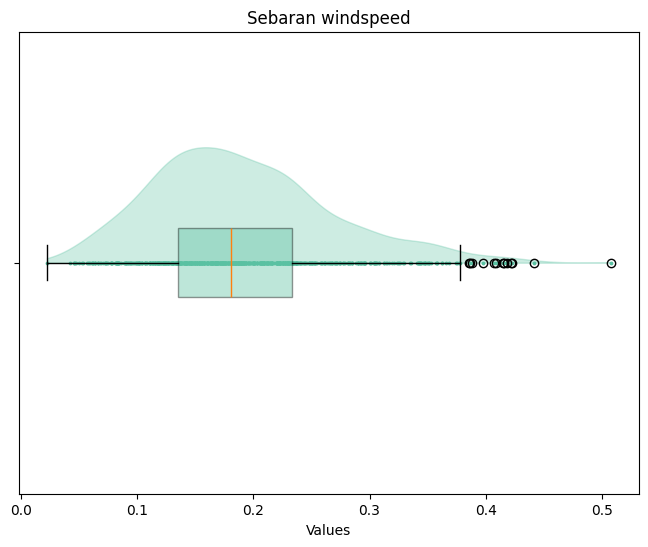

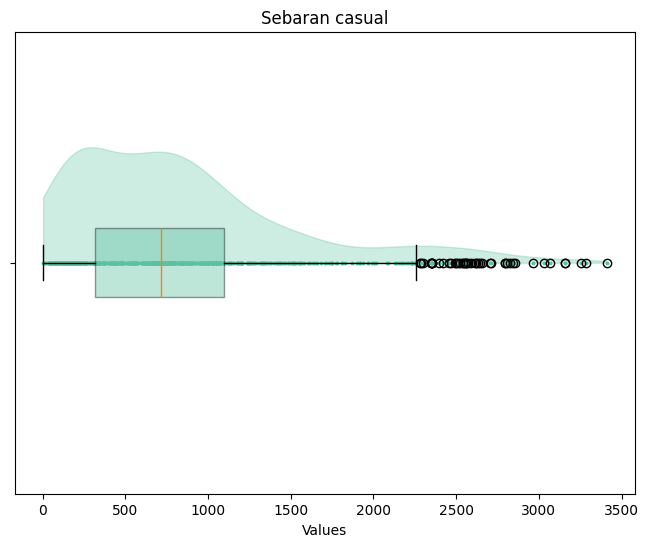

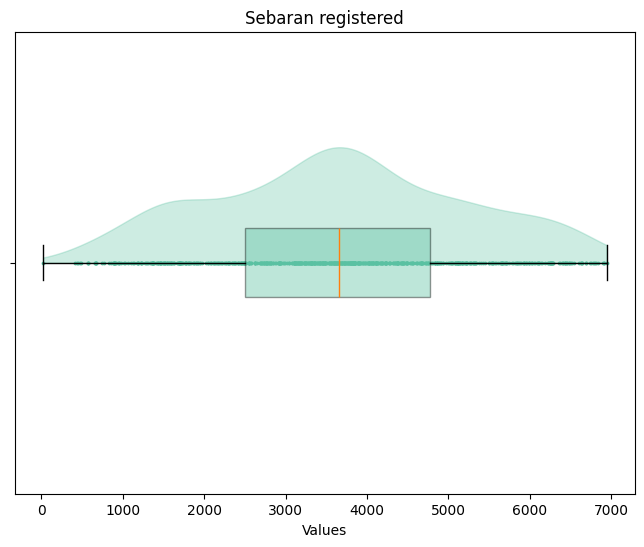

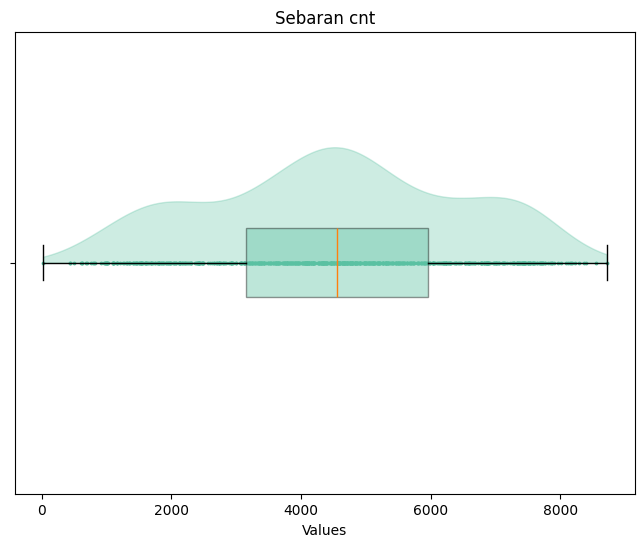

In [56]:
def plot_kon(data_frame, column):
    # Membuat subplots
    fig, ax = plt.subplots(figsize=(8, 6))

    # Create a list of colors for the boxplots based on the number of features you have
    boxplots_colors = ['#5AC1A2']

    # Boxplot data
    bp = ax.boxplot(data_frame[column], patch_artist=True, vert=False)

    # Change to the desired color and add transparency
    for patch, color in zip(bp['boxes'], boxplots_colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.4)

    # Create a list of colors for the violin plots based on the number of features you have
    violin_colors = ['#5AC1A2']

    # Violinplot data
    vp = ax.violinplot(data_frame[column], points=500, showmeans=False, showextrema=False, showmedians=False, vert=False)

    for idx, b in enumerate(vp['bodies']):
        # Get the center of the plot
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        # Modify it so we only see the upper half of the violin plot
        b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
        # Change to the desired color
        b.set_color(violin_colors[idx])

        # Create a list of colors for the scatter plots based on the number of features you have
        scatter_colors = ['#5AC1A2']

        # Scatterplot data
        plt.scatter(data_frame[column], np.ones(len(data_frame[column])), s=3, c=scatter_colors[0])

        plt.yticks([1], [''])  # Set text labels.
        plt.xlabel('Values')
        plt.title(f"Sebaran {column}")

    # Menampilkan plot
    plt.show()

# Memanggil fungsi untuk setiap kolom
plot_kon(dw_df, 'temp')
plot_kon(dw_df, 'atemp')
plot_kon(dw_df, 'hum')
plot_kon(dw_df, 'windspeed')
plot_kon(dw_df, 'casual')
plot_kon(dw_df, 'registered')
plot_kon(dw_df, 'cnt')

> Summary Sebaran Data:

1. Musim Gugur Mendominasi: Dalam rentang dua tahun yang diamati, musim gugur mencatat jumlah hari terbanyak dibandingkan dengan musim lainnya. Hal ini menunjukkan bahwa musim gugur mungkin menjadi waktu yang paling populer bagi pengguna sepeda.
2. Cuaca Berkabut yang Sering Terjadi: Dengan 247 hari dengan kondisi cuaca berkabut, hal ini menunjukkan bahwa kabut adalah fenomena cuaca yang cukup umum di wilayah tersebut. Hal ini perlu dipertimbangkan dalam analisis pola penggunaan sepeda.
3. Variasi Suhu yang Signifikan: Distribusi bimodal suhu menunjukkan adanya dua kondisi cuaca yang mungkin mempengaruhi penggunaan sepeda. Hal ini menyoroti pentingnya memahami variasi suhu untuk merencanakan kegiatan bersepeda yang nyaman.
4. Keterkaitan Antara Kelembapan dan Kenyamanan: Distribusi kelembapan yang stabil menunjukkan bahwa kenyamanan saat bersepeda mungkin dipengaruhi oleh tingkat kelembapan. Informasi ini dapat digunakan untuk menyesuaikan layanan berbagi sepeda agar sesuai dengan preferensi pengguna.
5. Perilaku Pengguna: Distribusi jumlah pengguna biasa yang cenderung lebih sedikit menunjukkan bahwa ada sebagian besar pengguna yang tidak menggunakan layanan secara teratur. Hal ini dapat menjadi titik fokus dalam upaya meningkatkan penggunaan sepeda secara konsisten.
6. Stabilitas Pengguna Terdaftar: Distribusi pengguna terdaftar yang merata menunjukkan bahwa pengguna terdaftar cenderung menggunakan layanan secara konsisten. Hal ini menunjukkan pentingnya menjaga kepuasan pengguna terdaftar untuk mempertahankan stabilitas penggunaan.
7. Stabilitas Jumlah Sepeda yang Disewakan: Distribusi data yang hampir normal menunjukkan bahwa pola penggunaan sepeda secara keseluruhan relatif stabil selama dua tahun tersebut. Hal ini mencerminkan konsistensi dalam permintaan dan penawaran layanan berbagi sepeda di wilayah tersebut.

## Menjawab Pertanyaan Bisnis

### Sebaran `cnt` per Musim tiap kondisi Cuaca 

C:\Users\Fathan\AppData\Local\Temp\ipykernel_166604\3127718179.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hue_order = dw_df.groupby('weathersit')['cnt'].sum().sort_values(ascending=False).index


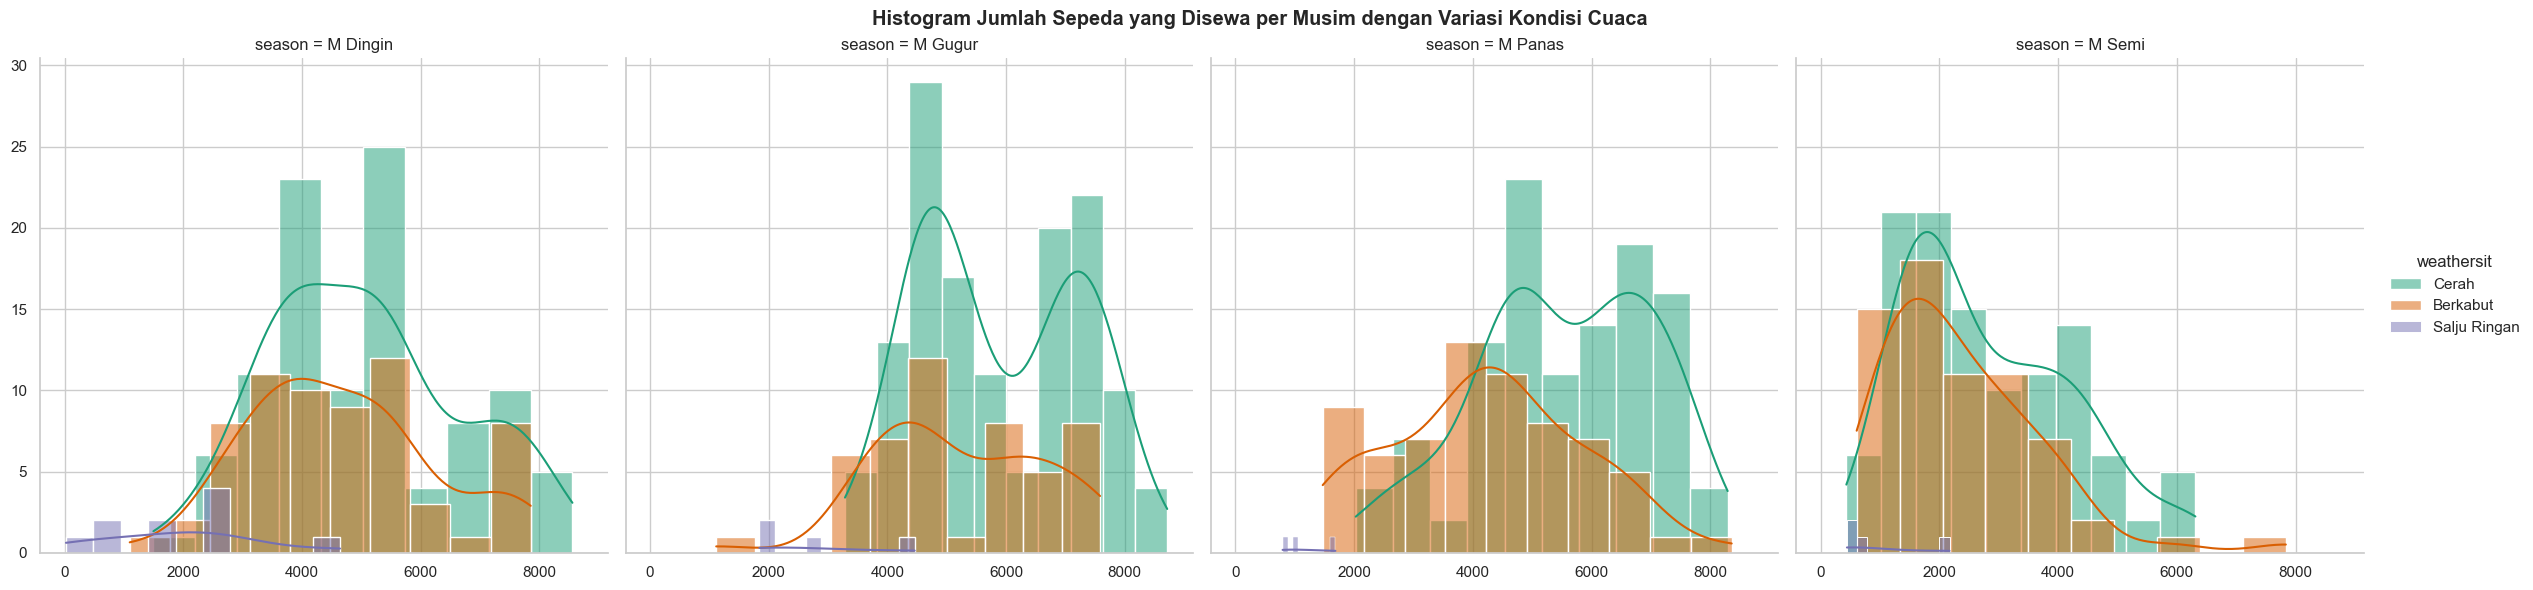

In [57]:
# Urutan hue berdasarkan jumlah cnt
hue_order = dw_df.groupby('weathersit')['cnt'].sum().sort_values(ascending=False).index

# Buat plot menggunakan seaborn dengan palet warna yang lebih kontras
sns.set(style="whitegrid")
g = sns.FacetGrid(dw_df, col="season", hue="weathersit", col_wrap=4, height=6, palette="Dark2", hue_order=hue_order)
g.map_dataframe(sns.histplot, x="cnt", bins=10, kde=True)
g.add_legend()

# Atur judul
plt.subplots_adjust(top=0.9)
plt.suptitle('Histogram Jumlah Sepeda yang Disewa per Musim dengan Variasi Kondisi Cuaca', fontweight='bold')
plt.show()

> Summary 

Berdasarkan analisis grafik yang diberikan, beberapa insight penting yang dapat diambil adalah:

1. Cuaca cerah memiliki tren penyewaan sepeda tertinggi di setiap musim, terutama pada musim gugur dan semi. Ini mengindikasikan bahwa kondisi cuaca cerah mendorong minat masyarakat untuk menyewa sepeda. Oleh karena itu, perusahaan penyewaan sepeda perlu mempersiapkan stok sepeda yang memadai pada musim-musim tersebut.

2. Pada musim dingin, cuaca cerah dan berkabut memiliki tren penyewaan sepeda yang cukup tinggi, meskipun lebih rendah daripada musim lainnya. Ini menunjukkan bahwa masyarakat masih memiliki minat untuk menyewa sepeda pada musim dingin, terutama pada cuaca cerah dan berkabut. Perusahaan penyewaan sepeda dapat mempertimbangkan untuk menyediakan layanan khusus atau promosi pada musim dingin untuk meningkatkan penyewaan.

3. Cuaca salju ringan memiliki tren penyewaan sepeda yang sangat rendah di setiap musim. Ini mengindikasikan bahwa masyarakat cenderung tidak menyewa sepeda pada saat cuaca salju ringan. Perusahaan penyewaan sepeda dapat mempertimbangkan untuk mengurangi jumlah sepeda yang tersedia atau bahkan menghentikan operasi sementara pada saat cuaca salju ringan untuk menghemat biaya operasional.

4. Tren penyewaan sepeda pada musim gugur dan panas cenderung lebih tinggi daripada musim lainnya, terutama pada cuaca cerah. Ini menunjukkan bahwa masyarakat lebih tertarik untuk menyewa sepeda pada musim-musim tersebut. Perusahaan penyewaan sepeda perlu mempersiapkan strategi pemasaran dan operasional yang sesuai untuk memenuhi permintaan yang tinggi pada musim-musim tersebut.

5. Secara umum, kondisi cuaca cerah dan musim yang sejuk (semi dan gugur) menjadi faktor pendorong utama dalam tren penyewaan sepeda. Perusahaan penyewaan sepeda perlu memperhatikan pola ini dan mengoptimalkan layanan serta sumber daya mereka sesuai dengan kondisi lingkungan dan musim.

Insight-insight ini dapat membantu perusahaan penyewaan sepeda dalam menganalisis pengaruh kondisi lingkungan dan musim terhadap tren penyewaan sepeda, serta mengembangkan strategi yang tepat untuk meningkatkan efisiensi operasional dan memenuhi permintaan pelanggan secara optimal.

### Perbandingan sepeda yang disewa pada Hari Libur dan Hari Kerja

#### Banyaknya Hari kerja dan Hari libur

C:\Users\Fathan\AppData\Local\Temp\ipykernel_166604\4272892039.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dw_df['holiday_encoded'] = dw_df['holiday'].replace({'Libur': 1, '-': 0}).astype(float)
C:\Users\Fathan\AppData\Local\Temp\ipykernel_166604\4272892039.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  dw_df['holiday_encoded'] = dw_df['holiday'].replace({'Libur': 1, '-': 0}).astype(float)
C:\Users\Fathan\AppData\Local\Temp\ipykernel_166604\4272892039.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be rem

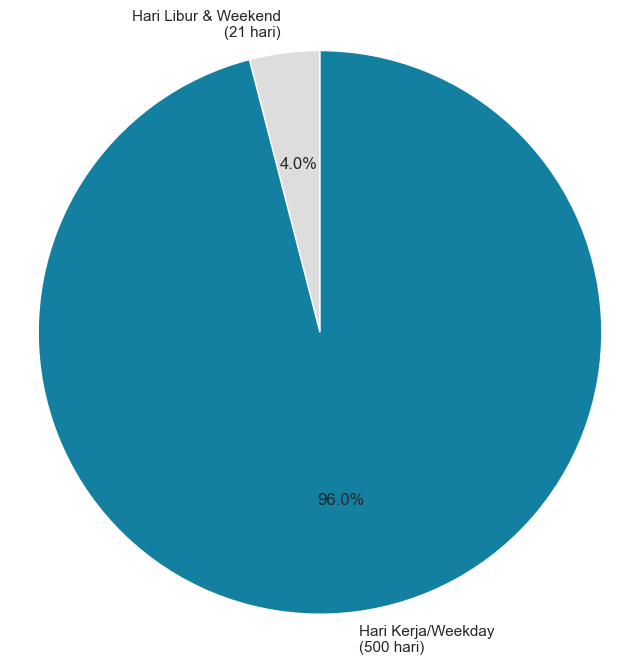

In [59]:
# Streamlit cloud ada masalha dalam operasi bool
# Encoding bool jadi 0 1 dan jadikan float
dw_df['holiday_encoded'] = dw_df['holiday'].replace({'Libur': 1, '-': 0}).astype(float)
dw_df['workingday_encoded'] = dw_df['workingday'].replace({'WeekEnd': 1, 'WeekDay': 0}).astype(float)

# Menghitung jumlah hari libur & weekend
holiday_weekend_count = dw_df[(dw_df['holiday_encoded'] == 1) & (dw_df['workingday_encoded'] == 1)].shape[0]

# Menghitung jumlah hari kerja/weekday
weekday_count = dw_df[(dw_df['holiday_encoded'] == 0) & (dw_df['workingday_encoded'] == 0)].shape[0]

# Membuat Pie Chart
fig, ax = plt.subplots(figsize=(8, 8))

# Plotting untuk hari libur & weekend dan hari kerja/weekday
labels = ['Hari Libur & Weekend', 'Hari Kerja/Weekday']
sizes = [holiday_weekend_count, weekday_count]
colors = ['#dddddd', '#1380A1']

# Pengecekan nilai sizes
if sum(sizes) == 0:
    st.warning("Tidak ada data untuk ditampilkan.")
else:
    # Menampilkan pie chart
    wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Menambahkan frekuensi di sebelah label
for i, label in enumerate(labels):
    texts[i].set_text(label + f'\n({sizes[i]} hari)')

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Banyaknya Sepeda yang disewa paer hari kerja/libur

C:\Users\Fathan\AppData\Local\Temp\ipykernel_166604\4234505890.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = dw_df.groupby(['holiday', 'workingday'])['cnt'].sum()


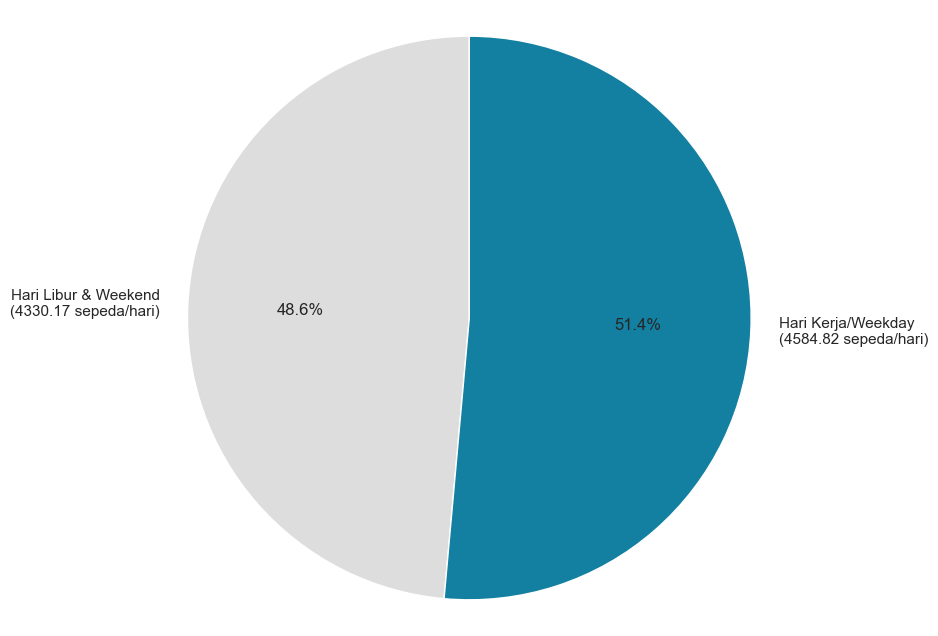

In [61]:
grouped_data = dw_df.groupby(['holiday', 'workingday'])['cnt'].sum()

# Menghitung jumlah hari libur & weekend
holiday_weekend_count = dw_df[(dw_df['holiday'] == 'Libur') & (dw_df['workingday'] == 'WeekEnd')].shape[0] + dw_df[(dw_df['holiday'] == '-') & (dw_df['workingday'] == 'WeekEnd')].shape[0]

# Menghitung jumlah hari kerja/weekday
weekday_count = dw_df[(dw_df['holiday'] == '-') & (dw_df['workingday'] == 'WeekDay')].shape[0] + dw_df[(dw_df['holiday'] == 'Libur') & (dw_df['workingday'] == 'WeekDay')].shape[0]

# Menghitung total penyewaan sepeda pada hari libur/weekend dan hari kerja/weekday
holiday_weekend = grouped_data.loc[('Libur', 'WeekEnd')] + grouped_data.loc[('-', 'WeekEnd')]
weekday_weekend = grouped_data.loc[('-', 'WeekDay')] + grouped_data.loc[('Libur', 'WeekDay')]

# Membuat Pie Chart
fig, ax = plt.subplots(figsize=(8, 8))

# Plotting untuk hari libur/weekend dan hari kerja/weekday
labels = ['Hari Libur & Weekend', 'Hari Kerja/Weekday']
sizes = [holiday_weekend / holiday_weekend_count, weekday_weekend / weekday_count]
colors = ['#dddddd', '#1380A1']

# Pengecekan nilai sizes
if any(size < 0 for size in sizes):
    st.warning("Nilai negatif tidak valid untuk membuat pie chart.")
else:
    # Menampilkan pie chart
    wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Menambahkan frekuensi di sebelah label
for i, label in enumerate(labels):
    texts[i].set_text(label + f'\n({sizes[i]:.2f} sepeda/hari)')

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Notes: Hari libur disini merupakan gabungan hari libur nasional dan hari Weekend. Sedangkan hari kerja diisini merupakan hari Weekday yang bukan hari libur nasional.

Perbedaan antara jumlah sepeda yang disewa pada hari libur dan kerja per hari ternyata tidak berbeda terlalu jauh. Walau begitu, frekuensi penyewaan sepeda lebih banyak pada hari kerja.

### Data Deret Waktu

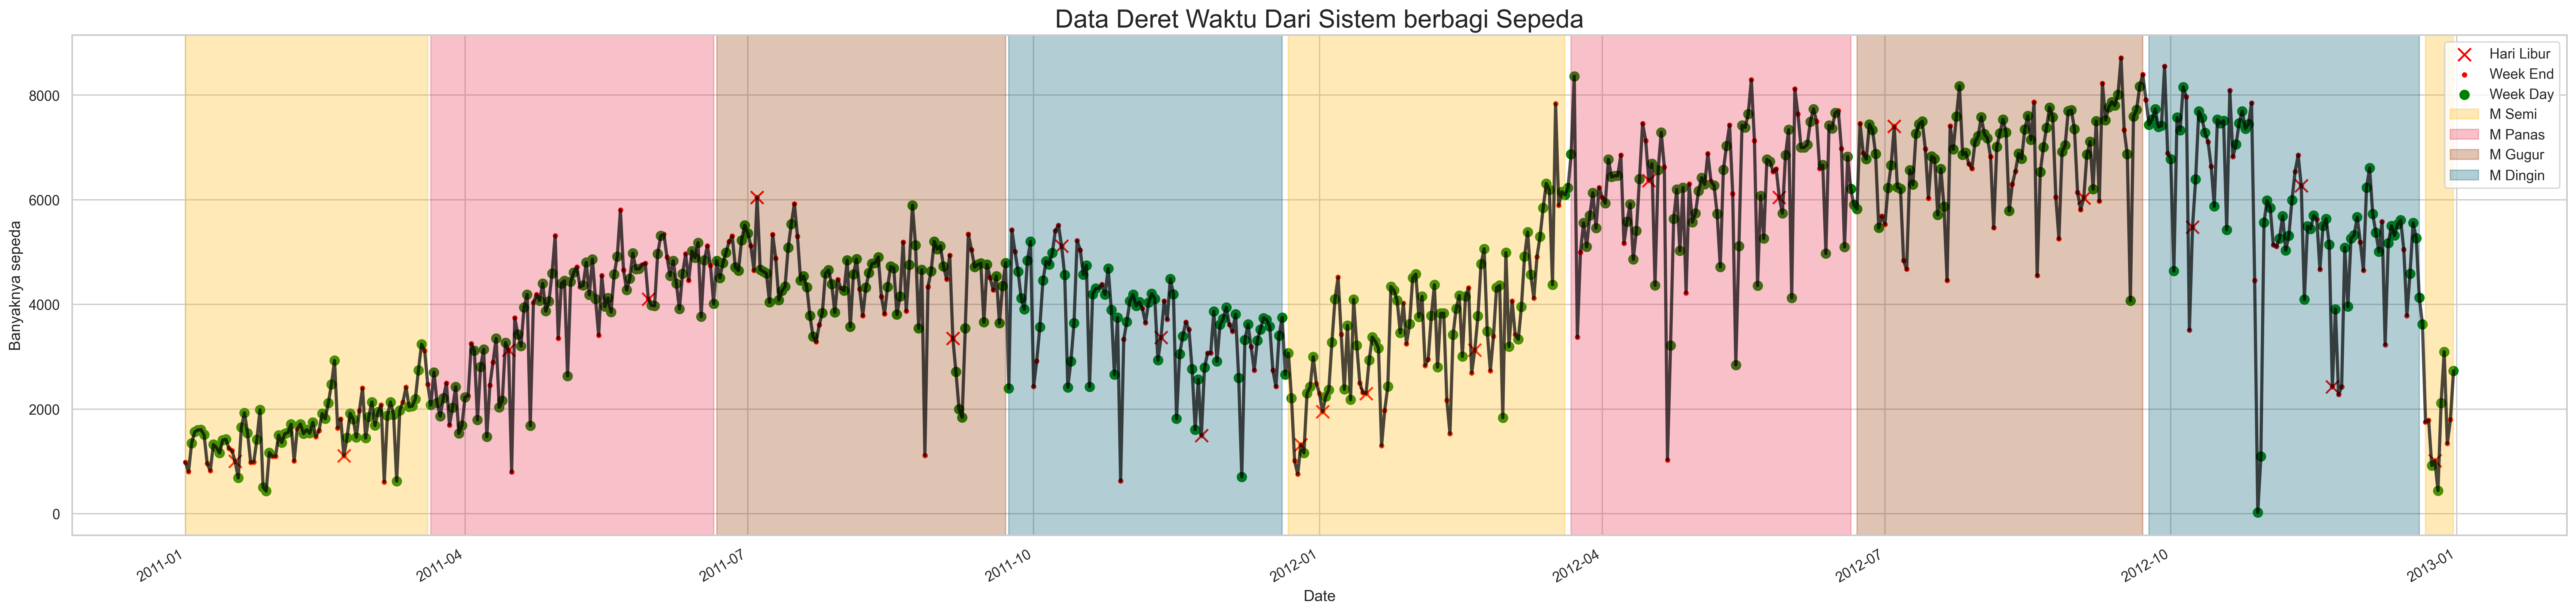

In [62]:
# Konversi kolom 'dteday' menjadi tipe data datetime
dw_df['dteday'] = day_df['dteday'] 
dw_df['dteday'] = pd.to_datetime(dw_df['dteday'])

import matplotlib.pyplot as plt
import pandas as pd

# Konversi kolom 'dteday' menjadi tipe data datetime
dw_df['dteday'] = pd.to_datetime(dw_df['dteday'])

# Plot the time series
plt.figure(figsize=(35, 8), dpi=300)
plt.plot(dw_df['dteday'], dw_df['cnt'], linestyle='-', color='black', alpha=0.7, linewidth=2.5)
plt.scatter(dw_df[dw_df['holiday'] != '-']['dteday'], dw_df[dw_df['holiday'] != '-']['cnt'], marker='x', color='red', label='Hari Libur', s=100)
plt.scatter(dw_df[dw_df['workingday'] != 'WeekDay']['dteday'], dw_df[dw_df['workingday'] != 'WeekDay']['cnt'], marker='o', color='red', label='Week End', s=10)
plt.scatter(dw_df[dw_df['workingday'] != 'WeekEnd']['dteday'], dw_df[dw_df['workingday'] != 'WeekEnd']['cnt'], marker='o', color='green', label='Week Day', s=50)
plt.title('Data Deret Waktu Dari Sistem berbagi Sepeda', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Banyaknya sepeda')
plt.grid(True)

# Menyesuaikan format tanggal pada sumbu x
plt.gcf().autofmt_xdate()

# Warna untuk setiap musim
colors = ['#feb813', '#e9324c', '#973a06', '#005e72']

# Daftar untuk menyimpan legenda unik
unique_legends = []

# Highlight each season's time range
for season, color in zip(dw_df['season'].unique(), colors):
    season_data = dw_df[dw_df['season'] == season]
    sorted_dates = season_data['dteday'].sort_values()
    
    start_range = None
    first_iteration = True
    for i in range(len(sorted_dates)):
        current_date = sorted_dates.iloc[i]
        if start_range is None:
            start_range = current_date
        elif (current_date - sorted_dates.iloc[i - 1]).days > 1 or i == len(sorted_dates) - 1:
            end_range = sorted_dates.iloc[i - 1] if i != len(sorted_dates) - 1 else current_date
            
            # Tambahkan legenda unik jika belum ada
            if season not in unique_legends:
                unique_legends.append(season)
                plt.axvspan(start_range, end_range, color=color, alpha=0.3, label=season)
            else:
                plt.axvspan(start_range, end_range, color=color, alpha=0.3)
            
            start_range = None
            first_iteration = False

# Menambahkan legenda
plt.legend()

plt.show()

> Insight pola penyewaan sepeda

1. Tren Musiman:

Terlihat bahwa tren penyewaan sepeda cenderung mengikuti pola musiman, dengan peningkatan pada musim semi dan musim panas, sedangkan pada musim gugur dan musim dingin cenderung stabil atau menurun. Hal ini mengindikasikan adanya pola permintaan yang terkait dengan musim dan cuaca.

2. Pengaruh Hari dalam Seminggu:

Hari-hari weekend memiliki tingkat penyewaan yang lebih tinggi dibandingkan dengan hari weekday. Namun, saat permintaan meningkat, perbedaan antara hari weekend dan weekday menjadi tidak terlalu signifikan. Ini menunjukkan bahwa permintaan sepeda cenderung bergantung pada faktor-faktor tertentu seperti cuaca atau acara khusus, bukan hanya hari dalam seminggu.

3. Pengaruh Hari Libur:

Meskipun hari libur nasional cenderung memiliki tingkat penyewaan yang lebih rendah dibandingkan dengan hari biasa, ada beberapa hari libur yang memiliki tingkat penyewaan yang tinggi. Ini menunjukkan bahwa ada faktor lain selain hari libur yang memengaruhi permintaan, seperti perayaan lokal atau acara khusus.

4. Pola Turun Drastis pada Awal 2013:

Terdapat penurunan drastis dalam jumlah penyewaan sepeda pada awal tahun 2013, terutama pada musim dingin. Hal ini mungkin disebabkan oleh perubahan faktor eksternal seperti kebijakan baru, perubahan tren, atau kondisi ekonomi.

5. Potensi Pengembangan Layanan:

Tren peningkatan jumlah total penyewaan sepeda dari tahun 2011 hingga 2012 menunjukkan adanya permintaan yang meningkat terhadap layanan penyewaan sepeda. Hal ini dapat menjadi peluang bagi penyedia layanan untuk mengembangkan atau meningkatkan layanan mereka, seperti menambah jumlah sepeda, meningkatkan promosi, atau menyesuaikan harga dengan pola permintaan yang berubah-ubah.

## Matriks Korelasi

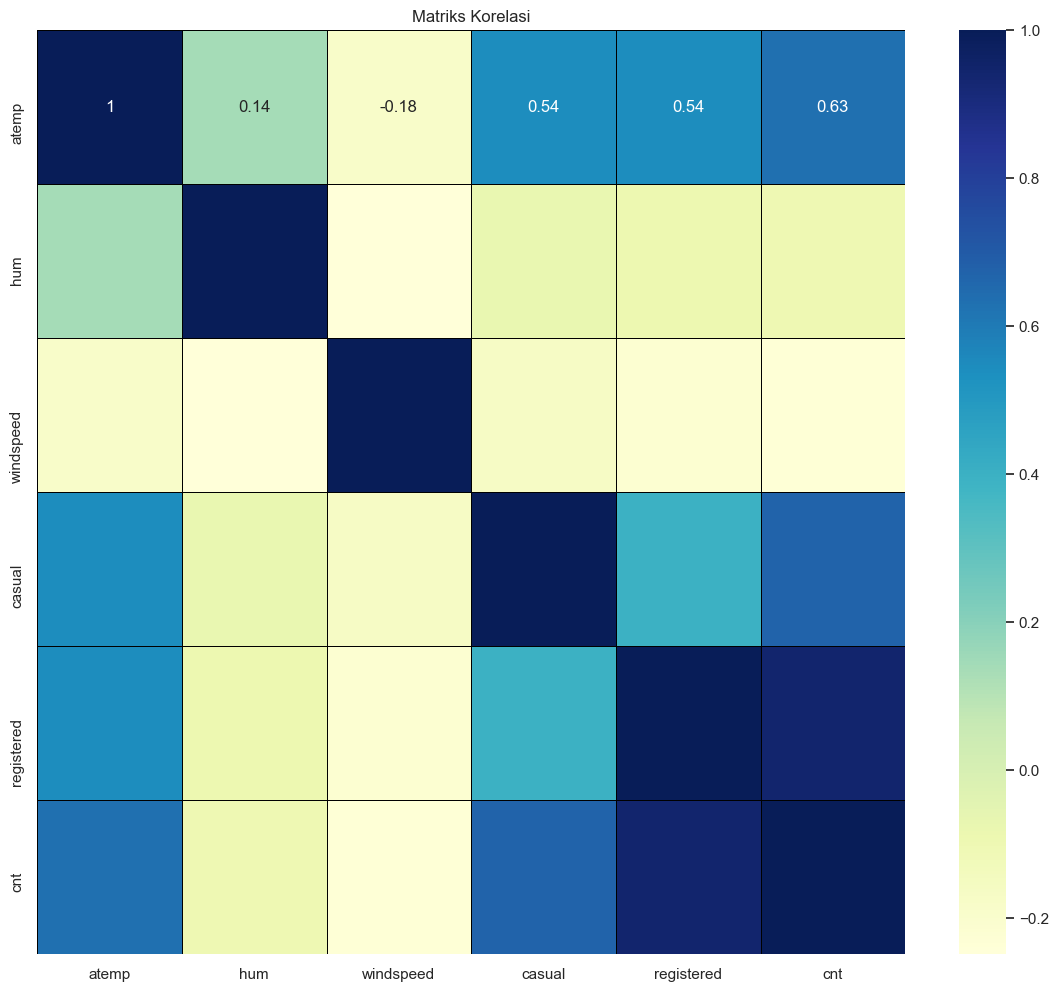

In [65]:
df = dw_df.iloc[:, 10:16]

# Menghitung matriks korelasi
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=True, cmap='YlGnBu', linewidths=0.5, linecolor='black')
plt.title('Matriks Korelasi')
plt.show()

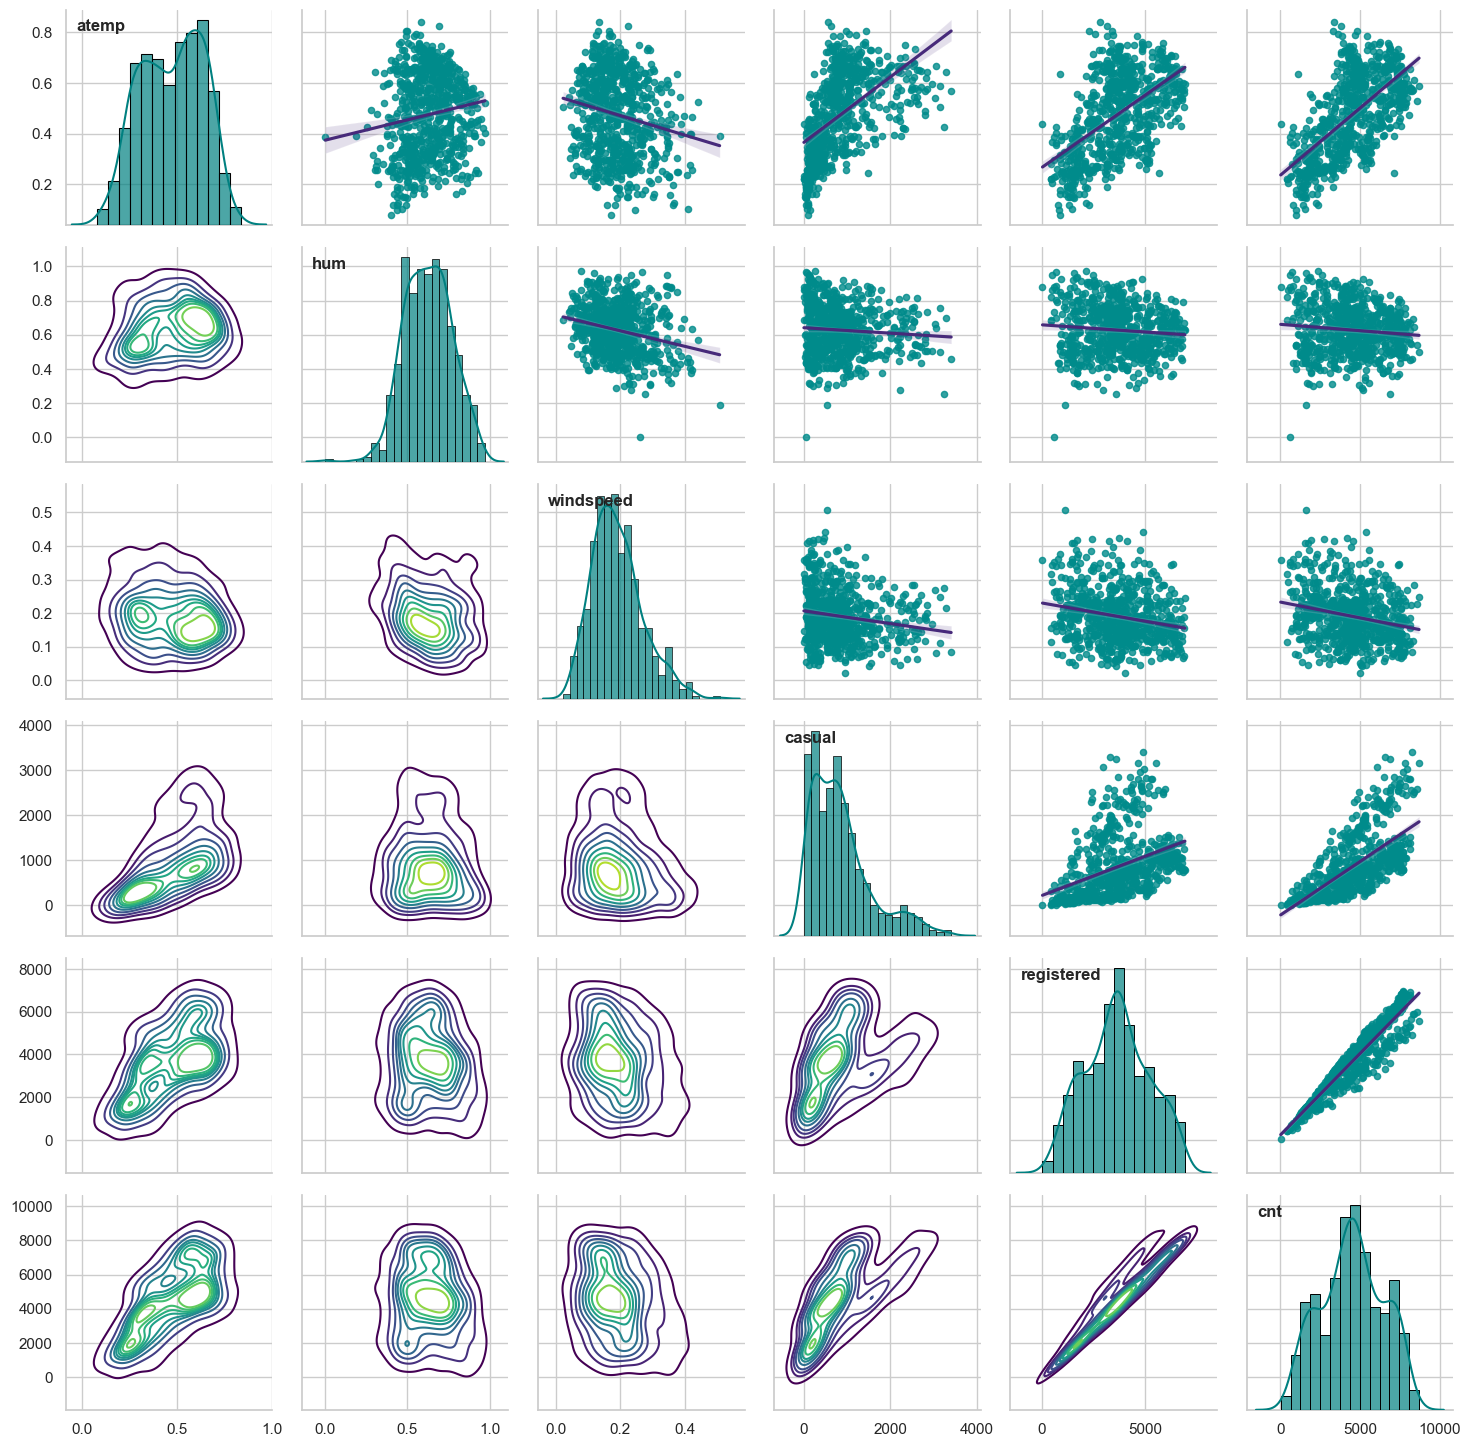

In [67]:
# Plot heatmap
def corrfunc(x, y, **kws):
  r, p = stats.pearsonr(x, y)
  p_stars = ''
  if p <= 0.05:
    p_stars = '*'
  if p <= 0.01:
    p_stars = '**'
  if p <= 0.001:
    p_stars = '***'
  ax = plt.gca()
  ax.annotate('r = {:.2f} '.format(r) + p_stars,
              xy=(0.05, 0.9), xycoords=ax.transAxes)

def annotate_colname(x, **kws):
  ax = plt.gca()
  ax.annotate(x.name, xy=(0.05, 0.9), xycoords=ax.transAxes,
              fontweight='bold')

def cor_matrix(df):
  g = sns.PairGrid(df, palette=['red'], diag_sharey=False)
  # Use normal regplot as `lowess=True` doesn't provide CIs.
  # Upper
  g.map_upper(sns.regplot, scatter_kws={'s': 20, 'color': 'DarkCyan'}, line_kws={'color': '#472a7a'}) 
  # Diag
  g.map_diag(sns.histplot, kde=True, kde_kws=dict(cut=3), alpha=.7, color='teal', edgecolor='black')
  g.map_diag(annotate_colname)
  # Lower
  g.map_lower(sns.kdeplot, cmap='viridis')
  g.map_lower(corrfunc)
  # Remove axis labels, as they're in the diagonals.
  for ax in g.axes.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')
  return g
cor_matrix(df)

> Interpretasi 

* Keterkaitan antara Variabel Registered dan Total Sepeda Disewakan: Insight dari matriks korelasi menunjukkan bahwa variabel registered memiliki korelasi positif yang paling kuat dengan variabel respons cnt. Ini menunjukkan bahwa jumlah sepeda yang disewakan yang didaftarkan memiliki keterkaitan yang erat dengan total jumlah sepeda yang disewakan secara keseluruhan. Hal ini mengindikasikan bahwa pengguna terdaftar memiliki pengaruh signifikan terhadap total penggunaan layanan sewa sepeda.
* Pengaruh Kelembapan Terhadap Jumlah Sepeda Disewakan: Korelasi negatif yang lemah antara variabel kelembapan udara (hum) dan total jumlah sepeda yang disewakan (cnt) menunjukkan bahwa kelembapan udara memiliki dampak yang relatif kecil terhadap permintaan layanan sewa sepeda. Hal ini menunjukkan bahwa faktor cuaca seperti kelembapan mungkin tidak menjadi faktor utama dalam menentukan jumlah sepeda yang disewakan, dan faktor-faktor lain seperti musim atau kondisi cuaca lainnya mungkin memiliki pengaruh yang lebih signifikan.

# 📱Unsupervised Learning

Data yang akan digunakan ialah data tanpa kolom `instant` dan `dteday`, serperti tabel berikut.

In [69]:
dw_df.drop(['dteday', 'instant', 'holiday_encoded', 'workingday_encoded'], axis=1).head(n=7)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,M Semi,2011,1,-,Minggu,WeekEnd,Berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
1,M Semi,2011,1,-,Senin,WeekEnd,Berkabut,0.363478,0.353739,0.696087,0.248539,131,670,801
2,M Semi,2011,1,-,Selasa,WeekDay,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,M Semi,2011,1,-,Rabu,WeekDay,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,M Semi,2011,1,-,Kamis,WeekDay,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,M Semi,2011,1,-,Jum'at,WeekDay,Cerah,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,M Semi,2011,1,-,Sabtu,WeekDay,Berkabut,0.196522,0.208839,0.498696,0.168726,148,1362,1510


Terlihat bahwa ada beberapa data yang kategorik, jadi Data akan dibuat dummy variable dulu sebelum dilakukan clustering.

#### Dummy Variabel

In [71]:
#Dummy
dw_dummy = pd.get_dummies(dw_df.drop(['dteday', 'instant', 'holiday_encoded', 'workingday_encoded'], axis=1), drop_first=True).astype(float)
dw_dummy.head(n=7)

,temp,atemp,hum,windspeed,casual,registered,cnt,season_M Gugur,season_M Panas,season_M Semi,...,holiday_Libur,weekday_Kamis,weekday_Minggu,weekday_Rabu,weekday_Sabtu,weekday_Selasa,weekday_Senin,workingday_WeekEnd,weathersit_Cerah,weathersit_Salju Ringan
0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.204348,0.233209,0.518261,0.089565,88.0,1518.0,1606.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.196522,0.208839,0.498696,0.168726,148.0,1362.0,1510.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## K-Means Clustering

> Penentuan Jumlah Cluster

Ada beberapa metode yang biasa digunakan untuk menentukan jumlah Cluster, salah satunya adalah metode Elbow. Pertama-tama data di scaling dahulu untuk setiap peubah (kolom) dengan mean 0, dan stan deviasi 1.

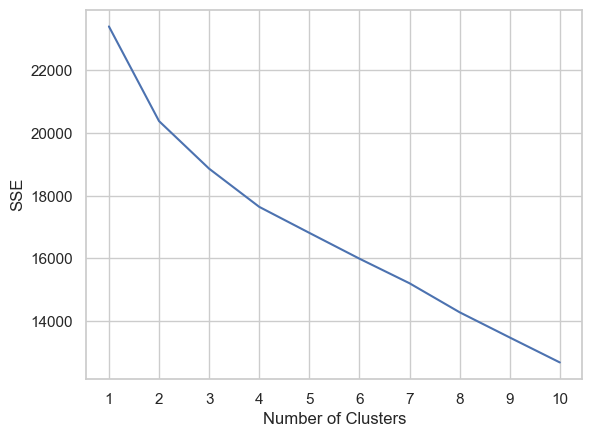

In [72]:
#create scaled DataFrame where each variable has mean of 0 and standard dev of 1
scaled_df = StandardScaler().fit_transform(dw_dummy)

# Elbow
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Metode Elbow menetukan cluster dengan melihat siku mana yang paling runcing. Terlihat bahwa siku yang paling runcing berada di nomor 2. Sehingga jumlah cluster yang optimal menurut metode elbow adalah 2.

## Hasil K-Means Clustering

> Tabel Data

In [73]:
#kmeans
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=2, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(scaled_df)

#append cluster assingments to original DataFrame
km_data = dw_df.drop(['holiday_encoded', 'workingday_encoded'], axis=1)
km_data['cluster'] = kmeans.labels_

col = km_data.pop('cluster')
km_data.insert(1, col.name, col)

km_data.head(n=7)

,instant,cluster,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,2011-01-01,M Semi,2011,1,-,Minggu,WeekEnd,Berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,0,2011-01-02,M Semi,2011,1,-,Senin,WeekEnd,Berkabut,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,0,2011-01-03,M Semi,2011,1,-,Selasa,WeekDay,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,0,2011-01-04,M Semi,2011,1,-,Rabu,WeekDay,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,0,2011-01-05,M Semi,2011,1,-,Kamis,WeekDay,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,0,2011-01-06,M Semi,2011,1,-,Jum'at,WeekDay,Cerah,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,0,2011-01-07,M Semi,2011,1,-,Sabtu,WeekDay,Berkabut,0.196522,0.208839,0.498696,0.168726,148,1362,1510


Keanggotaan cluster bisa dilihat pada kolom cluster yakni kolom kedua. Angka nol tersebut menandakan bahwa baris tersebut merupakan anggota dari cluster 0.

#### Perbandingan jumlah antar cluster

In [74]:
km_data["cluster"].value_counts()

cluster
1    403
0    328
Name: count, dtype: int64

Perbandingan jumlah antara cluster 0 dengan cluster 1 tidak berbeda jauh. Hanya memiliki selisih 75 anggota saja.

#### Cluster Profiling

In [78]:
# Memisahkan kolom numerik dan non-numerik
numeric_cols = km_data.select_dtypes(include=['number']).columns
non_numeric_cols = km_data.select_dtypes(exclude=['number']).columns

# Membuat list kategori numerik
categories = numeric_cols[2:]  # Menggunakan semua kolom numerik (termasuk 'temp')

# Daftar warna kalem untuk setiap cluster
colors = ['rgba(153, 204, 255, 0.5)', 'rgba(204, 255, 204, 0.5)', 'rgba(255, 204, 204, 0.5)', 
          'rgba(204, 204, 255, 0.5)', 'rgba(255, 204, 153, 0.5)', 'rgba(204, 153, 255, 0.5)']

# Membuat figure
fig = go.Figure()

# Menambahkan trace untuk setiap cluster
for i, cluster in enumerate(km_data['cluster'].unique()):
    cluster_data = km_data[km_data['cluster'] == cluster][categories]
    fig.add_trace(go.Scatterpolar(
        r=cluster_data.mean().values,
        theta=categories,
        fill='toself',  # Fill area dengan warna
        fillcolor=colors[i % len(colors)],  # Warna fill sesuai cluster
        mode='lines',  # Menampilkan garis dan area fill
        name=f'Cluster {cluster}',
        line=dict(color='white')  # Mengatur warna garis menjadi putih
    ))

# Mengatur layout
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, color='white'),  # Mengatur warna radial axis menjadi putih
        angularaxis=dict(color='white'),  # Mengatur warna angular axis menjadi putih
        bgcolor='black'  # Mengatur warna latar belakang menjadi hitam
    ),
    showlegend=True,
    plot_bgcolor='black'  # Mengatur warna latar belakang menjadi hitam
)
fig.show()

> Penjelasan Radar Chart

1. Karakteristik Kluster:

    Miripnya Karakteristik: Semua klaster memiliki nilai yang rendah atau bahkan tidak ada pada variabel 'windspeed', 'hum', 'atemp', dan 'temp'. Hal ini menunjukkan bahwa variabel-variabel ini mungkin tidak memiliki pengaruh yang signifikan dalam membentuk klaster.

    Perbedaan dalam Jumlah Peminjaman: Meskipun karakteristik dasar dari klaster cenderung mirip, terdapat perbedaan yang signifikan dalam jumlah peminjaman sepeda ('cnt'), baik secara total maupun terbagi antara peminjaman terdaftar ('registered') dan peminjaman tidak terdaftar ('casual').

2. Insight:

    Pengaruh Variabel Cuaca: Karakteristik yang mirip pada variabel cuaca ('windspeed', 'hum', 'atemp', dan 'temp') menunjukkan bahwa faktor-faktor ini mungkin tidak memiliki peran yang dominan dalam pembentukan klaster. Hal ini bisa disebabkan oleh variasi yang rendah dari variabel cuaca di seluruh dataset.

    Perbedaan dalam Jumlah Peminjaman: Perbedaan yang signifikan dalam jumlah peminjaman antara klaster menunjukkan bahwa ada faktor-faktor lain di luar variabel cuaca yang mempengaruhi perilaku peminjaman sepeda. Hal ini bisa jadi disebabkan oleh faktor-faktor seperti lokasi, waktu, promosi, atau kebijakan penyewaan yang berbeda.

## Kesimpulan 

Berdasarkan analisis radar chart dan perbandingan nilai variabel pada setiap klaster, dapat disimpulkan bahwa karakteristik cuaca, seperti kecepatan angin ('windspeed'), kelembaban udara ('hum'), suhu aktual ('atemp'), dan suhu ('temp'), cenderung memiliki pengaruh yang serupa di semua klaster. Hal ini menunjukkan bahwa faktor-faktor cuaca tersebut mungkin tidak menjadi faktor utama yang memengaruhi pola peminjaman sepeda. Namun, terdapat perbedaan signifikan dalam jumlah peminjaman sepeda antara klaster. Klaster dengan jumlah peminjaman yang lebih tinggi, baik secara total maupun terbagi antara peminjaman terdaftar dan tidak terdaftar, menunjukkan bahwa ada faktor-faktor lain di luar cuaca yang memengaruhi perilaku peminjaman sepeda. Kemungkinan faktor-faktor seperti lokasi, waktu, promosi, atau kebijakan penyewaan yang berbeda dapat menjadi penjelasan atas perbedaan ini. Oleh karena itu, studi ini menunjukkan bahwa aspek-aspek lain selain cuaca dapat memiliki dampak yang signifikan terhadap tren peminjaman sepeda, dan analisis lebih lanjut diperlukan untuk memahami faktor-faktor tersebut dan bagaimana kontribusinya terhadap jumlah peminjaman sepeda.


# 📈 Regresi

Data yang digunakan sama dengan yang ada di K-Means Clustering.

In [116]:
dw_dummy.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,season_M Gugur,season_M Panas,season_M Semi,...,holiday_Libur,weekday_Kamis,weekday_Minggu,weekday_Rabu,weekday_Sabtu,weekday_Selasa,weekday_Senin,workingday_WeekEnd,weathersit_Cerah,weathersit_Salju Ringan
0,0.344167,0.363625,0.805833,0.160446,331,654,985,False,False,True,...,False,False,True,False,False,False,False,True,False,False
1,0.363478,0.353739,0.696087,0.248539,131,670,801,False,False,True,...,False,False,False,False,False,False,True,True,False,False
2,0.196364,0.189405,0.437273,0.248309,120,1229,1349,False,False,True,...,False,False,False,False,False,True,False,False,True,False
3,0.200000,0.212122,0.590435,0.160296,108,1454,1562,False,False,True,...,False,False,False,True,False,False,False,False,True,False
4,0.226957,0.229270,0.436957,0.186900,82,1518,1600,False,False,True,...,False,True,False,False,False,False,False,False,True,False


In [80]:
# Mengonversi tipe data kolom dalam DataFrame menjadi numerik
dw_dummy = dw_dummy.astype(float)

# Memisahkan variabel independen (X) dan variabel dependen (y)
X = dw_dummy.drop(columns=['cnt'])  # Peubah independen, kecuali cnt
y = dw_dummy['cnt']  # Peubah dependen

# Menambahkan kolom konstan untuk model
X = sm.add_constant(X)

# Membuat model regresi
model = sm.OLS(y, X)

# Melatih model menggunakan data
results = model.fit()

# Menampilkan ringkasan hasil regresi
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.155e+31
Date:                Fri, 08 Mar 2024   Prob (F-statistic):               0.00
Time:                        06:52:03   Log-Likelihood:                 18649.
No. Observations:                 731   AIC:                        -3.724e+04
Df Residuals:                     700   BIC:                        -3.709e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Agak aneh, kita cek multikolinearitasnya.

## Cek Multikolinaritas

In [122]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Pengecekan Multikolinieritas
X = dw_dummy.drop(columns=['cnt'])  # Variabel independen
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

# Seleksi Variabel dengan Metode Subset Selection
# Implementasikan metode forward selection, backward elimination, atau best subset selection di sini.

                    feature         VIF
0                   cluster   13.940936
1                      temp  680.089273
2                     atemp  658.986254
3                       hum   30.966070
4                 windspeed    8.304658
5                    casual   10.841495
6                registered   39.829079
7            season_M Gugur   11.434266
8            season_M Panas   12.813399
9             season_M Semi    7.114154
10                  yr_2012    5.998419
11                   mnth_2    1.986861
12                   mnth_3    2.904517
13                   mnth_4    6.174013
14                   mnth_5    7.699076
15                   mnth_6    8.086235
16                   mnth_7   10.083634
17                   mnth_8    9.511817
18                   mnth_9    7.165616
19                  mnth_10    5.398480
20                  mnth_11    4.359124
21                  mnth_12    2.945175
22            holiday_Libur         inf
23            weekday_Kamis    2.000221


c:\Users\Fathan\Documents\Obsidian Vault\2. Kuliah\Smt 6\@ Bangkit 2024\myenv\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning:

divide by zero encountered in scalar divide

